识别->分类->理解

In [1]:
import cv2

# 图像的基本知识

- 通道：色彩空间
- 灰度：明暗程度，越小越接近黑色
    - 通道上像素的灰度，也就是 矩阵的值 ，几乎100%决定了图像会呈现什么样子
- 彩色通道：
    - RGB(红绿蓝三基色)
    - CMYK
    - HSV(H:色相,S:饱和度,V:亮度)
    - RGBA(alpha 透明度)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
# 读取计算机中的图像
img = cv2.imread('/Users/feishuoren/Projects/pytorch_learning/imgs/IMG_001.JPG')

In [4]:
img.shape

(1229, 1000, 3)

In [5]:
img # 不反回值则导入错误，又返回则正确

array([[[106, 127, 118],
        [106, 127, 118],
        [106, 127, 118],
        ...,
        [111, 129, 122],
        [111, 129, 122],
        [114, 132, 125]],

       [[105, 126, 117],
        [105, 126, 117],
        [105, 126, 117],
        ...,
        [111, 129, 122],
        [112, 130, 123],
        [114, 132, 125]],

       [[109, 130, 121],
        [110, 131, 122],
        [110, 131, 122],
        ...,
        [104, 122, 115],
        [103, 121, 114],
        [104, 122, 115]],

       ...,

       [[109, 129, 116],
        [111, 131, 118],
        [110, 133, 119],
        ...,
        [208, 198, 211],
        [207, 197, 210],
        [210, 200, 213]],

       [[109, 129, 116],
        [110, 130, 117],
        [109, 132, 118],
        ...,
        [212, 202, 215],
        [211, 201, 214],
        [214, 204, 217]],

       [[109, 129, 116],
        [109, 129, 116],
        [108, 131, 117],
        ...,
        [216, 206, 218],
        [217, 207, 219],
        [221, 211, 223]]

(-0.5, 999.5, 1228.5, -0.5)

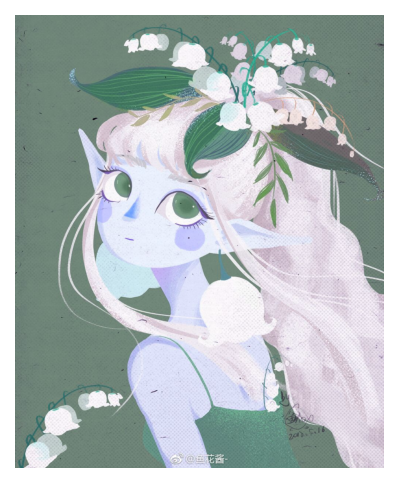

In [6]:
# 展示图片
plt.figure(dpi=150) # 画布， dpi 分辨率
plt.imshow(img)
plt.axis('off') # 不显示坐标轴

In [7]:
# OpenCV 在读取图像时会默认图像通道的顺序是BGR

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 转换方式

(-0.5, 999.5, 1228.5, -0.5)

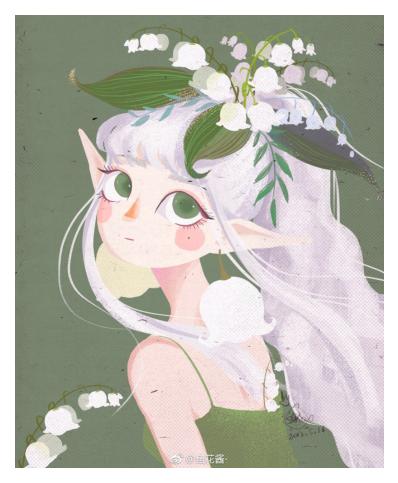

In [9]:
# 展示图片
plt.figure(dpi=150) # 画布， dpi 分辨率
plt.imshow(img)
plt.axis('off') # 不显示坐标轴

In [10]:
img.dtype # uint8 限制像素值区间 0-255

dtype('uint8')

In [11]:
a = np.array([0, 1, 255], dtype='uint8')

In [12]:
a

array([  0,   1, 255], dtype=uint8)

In [13]:
a + 10

array([10, 11,  9], dtype=uint8)

In [14]:
a - 10

array([246, 247, 245], dtype=uint8)

In [15]:
# 太亮应该为白，结果变黑
# 解决如下: 先变为浮点数再用np.clip()

In [16]:
# 将img 从uint变为浮点数

In [17]:
img = img * 1.0
# img = img / 255
img

array([[[118., 127., 106.],
        [118., 127., 106.],
        [118., 127., 106.],
        ...,
        [122., 129., 111.],
        [122., 129., 111.],
        [125., 132., 114.]],

       [[117., 126., 105.],
        [117., 126., 105.],
        [117., 126., 105.],
        ...,
        [122., 129., 111.],
        [123., 130., 112.],
        [125., 132., 114.]],

       [[121., 130., 109.],
        [122., 131., 110.],
        [122., 131., 110.],
        ...,
        [115., 122., 104.],
        [114., 121., 103.],
        [115., 122., 104.]],

       ...,

       [[116., 129., 109.],
        [118., 131., 111.],
        [119., 133., 110.],
        ...,
        [211., 198., 208.],
        [210., 197., 207.],
        [213., 200., 210.]],

       [[116., 129., 109.],
        [117., 130., 110.],
        [118., 132., 109.],
        ...,
        [215., 202., 212.],
        [214., 201., 211.],
        [217., 204., 214.]],

       [[116., 129., 109.],
        [116., 129., 109.],
        [117., 1

In [18]:
# np.clip() 用来将数字限制在某个范围内的函数

In [19]:
b = np.array([288, -3, 250])

In [20]:
np.clip(b,0,255)

array([255,   0, 250])

In [21]:
img = img / 255
img

array([[[0.4627451 , 0.49803922, 0.41568627],
        [0.4627451 , 0.49803922, 0.41568627],
        [0.4627451 , 0.49803922, 0.41568627],
        ...,
        [0.47843137, 0.50588235, 0.43529412],
        [0.47843137, 0.50588235, 0.43529412],
        [0.49019608, 0.51764706, 0.44705882]],

       [[0.45882353, 0.49411765, 0.41176471],
        [0.45882353, 0.49411765, 0.41176471],
        [0.45882353, 0.49411765, 0.41176471],
        ...,
        [0.47843137, 0.50588235, 0.43529412],
        [0.48235294, 0.50980392, 0.43921569],
        [0.49019608, 0.51764706, 0.44705882]],

       [[0.4745098 , 0.50980392, 0.42745098],
        [0.47843137, 0.51372549, 0.43137255],
        [0.47843137, 0.51372549, 0.43137255],
        ...,
        [0.45098039, 0.47843137, 0.40784314],
        [0.44705882, 0.4745098 , 0.40392157],
        [0.45098039, 0.47843137, 0.40784314]],

       ...,

       [[0.45490196, 0.50588235, 0.42745098],
        [0.4627451 , 0.51372549, 0.43529412],
        [0.46666667, 0

(-0.5, 999.5, 1228.5, -0.5)

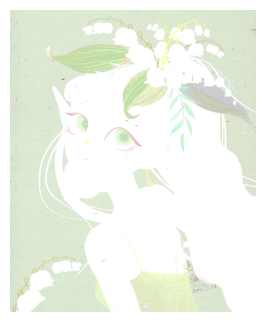

In [22]:
# 调亮画面
img_ = np.clip(img + 100/255, 0, 1)
plt.figure(dpi=100)
plt.imshow(img_)
plt.axis('off')

(-0.5, 999.5, 1228.5, -0.5)

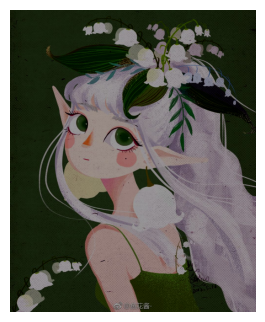

In [23]:
# 调暗画面
img_ = np.clip(img - 100/255, 0, 1)
plt.figure(dpi=100)
plt.imshow(img_)
plt.axis('off')

(-0.5, 999.5, 1228.5, -0.5)

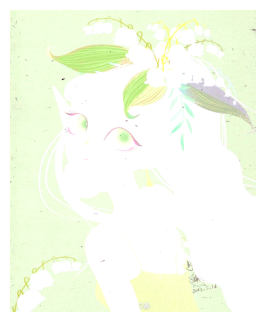

In [24]:
# 让画面更鲜艳（增加对比度）
img_ = np.clip(img * 2, 0, 1) # 原本就很大的值会增长的更快，因此原本就很鲜艳的颜色会变得更加鲜艳，增加对比度
plt.figure(dpi=100)
plt.imshow(img_)
plt.axis('off')

In [25]:
# OpenCV 默认读取后图像通道为 BGR，为了调整饱和度，将通道转换为 HSV
# 读取计算机中的图像
img = cv2.imread('/Users/feishuoren/Projects/pytorch_learning/imgs/IMG_001.JPG')

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [26]:
img_hsv

array([[[ 43,  42, 127],
        [ 43,  42, 127],
        [ 43,  42, 127],
        ...,
        [ 42,  36, 129],
        [ 42,  36, 129],
        [ 42,  35, 132]],

       [[ 43,  43, 126],
        [ 43,  43, 126],
        [ 43,  43, 126],
        ...,
        [ 42,  36, 129],
        [ 42,  35, 130],
        [ 42,  35, 132]],

       [[ 43,  41, 130],
        [ 43,  41, 131],
        [ 43,  41, 131],
        ...,
        [ 42,  38, 122],
        [ 42,  38, 121],
        [ 42,  38, 122]],

       ...,

       [[ 50,  40, 129],
        [ 50,  39, 131],
        [ 48,  44, 133],
        ...,
        [157,  16, 211],
        [157,  16, 210],
        [157,  16, 213]],

       [[ 50,  40, 129],
        [ 50,  39, 130],
        [ 48,  44, 132],
        ...,
        [157,  15, 215],
        [157,  15, 214],
        [157,  15, 217]],

       [[ 50,  40, 129],
        [ 50,  40, 129],
        [ 48,  45, 131],
        ...,
        [155,  14, 218],
        [155,  14, 219],
        [155,  14, 223]]

In [28]:
img == img_hsv

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False,  True],
        [False, False,  True],
        [False, False,  True]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False,  True],
        [False, False,  True],
        [False,

In [29]:
h, s, v = cv2.split(img_hsv)

In [31]:
# 这里分解出的是 uint8， 要在 uint8 上进行数值操作则必须先更换为浮点数

# h += np.clip(s*1.0 + 100, 0, 255).astype("uint8") # 色相
s += np.clip(s*1.0+100, 0, 255).astype("uint8") # 饱和度
# v += np.clip(s*1.0+100, 0, 255).astype("uint8") # 亮度
final_hsv = cv2.merge((h,s,v)) # 合并为完整的图像

In [32]:
# 转为RGB
img_s = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)

(-0.5, 999.5, 1228.5, -0.5)

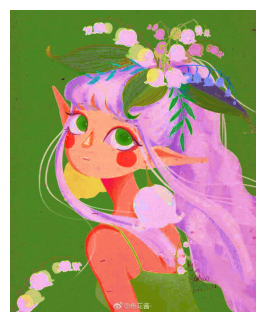

In [33]:
plt.figure(dpi=100)
plt.imshow(img_s)
plt.axis('off')

In [34]:
# 由于灰度的存在，图像可以被表示为二元函数，f(x,y),自变量x,y分别是图像的宽度和高度，函数值是该通道上的灰度
# 对图像的操作也可用数学的方式来表示

## 卷积

卷积操作`*`：两个矩阵，其中一个旋转180度后与另一个矩阵求点积（加权求和）的结果

- 卷积：两个矩阵大小相同，由于图像像素值一般很大，抽取图像中一个区域卷积
- 边缘检测、锐化、模糊、图像降噪等，都是从图像中提取部分信息，该图像处理技术称为“特征提取”技术
- 经典算子：拉普拉斯、索贝尔（横向、纵向）

纵向的索贝尔算子[[-1,0,1],[-2,0,2],[-1,0,1]]

> 在今天的计算机视觉技术中，尤其是深度学习中，大部分不再进行“旋转”，当没有旋转只有点积时，该运算称为 互相关


与图像相乘的旋转矩阵，矩阵称为 过滤器（卷积核），矩阵的值称为 权重，卷积核在原图上扫描的区域称为 感受野，卷积核与感受野点积得到的心矩阵被叫做 特征图 或 激活图



In [37]:
# 读取计算机中的图像
img = cv2.imread('/Users/feishuoren/Projects/pytorch_learning/imgs/IMG_001.JPG')

img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 999.5, 1228.5, -0.5)

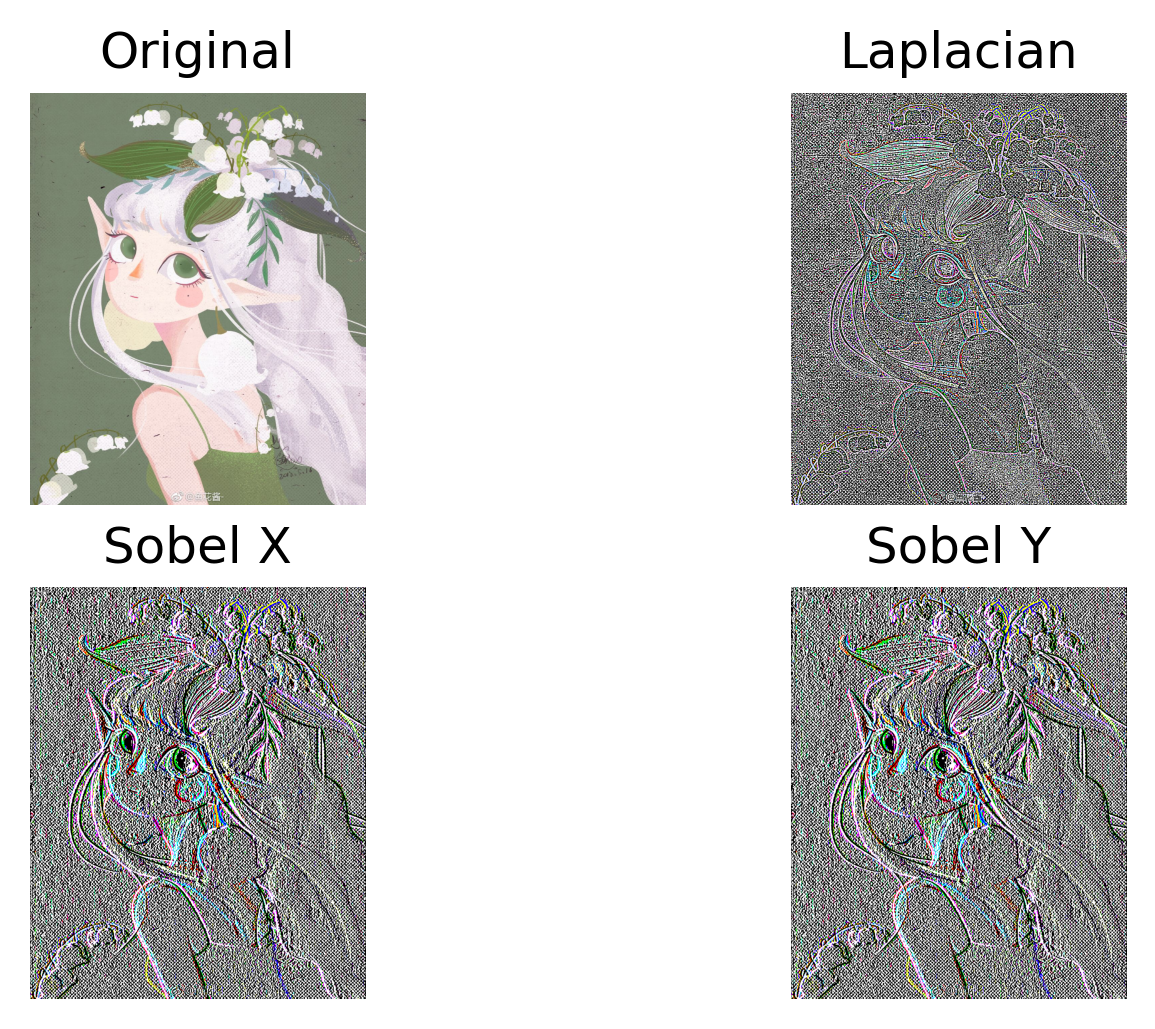

In [38]:
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=5)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(dpi=300)

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

### 通过学习寻找卷积核
让计算机自己寻找合适的卷积核，并且对分类最有利

##### 参数共享（Parameter Sharing）：卷积带来参数量（权重量）骤减

（600，400）的图像

若输入全连接层的 DNN，将像素拉平到一位，输入层需要24万个神经元，则需要24万个参数处理这层的全部像素。
假设有多个隐藏层，且隐藏层的神经元个数为一万，则DNN大约需要24亿个参数。

卷积神经网络拥有参数共享的性质，令参数量骤减。
图像上每个小块的感受野都使用相同的卷积核进行过滤，卷积神经网络要求解的参数就是卷积核上的所有数字，
则24万像素点共享卷积核就等于共享参数。
假设卷积核的尺寸是5*5，则处理24万个像素点就需要25个参数。
假设卷积中其他需要参数层也达到一万个，那CNN所需的参数也只有25万。

##### 稀疏交互：获取更深入的特征

> 卷积神经网络如何保证提取到的特征比传统方法，如索贝尔算子等方法更深呢？

神经网络中，一个神经元只能存储一个数字，一个像素就是一个神经元。

CNN中神经元不需要全链接，下层特征图的一个神经元只和上层感受野有关，这种特征被称为 稀疏交互。

稀疏交互让CNN获得了提取更深特征的能力。

二维卷积层nn.Conv2d
卷积层作为构成神经网络的层，shinn.MOdule模块下的一个类
根据输入数据的维度，卷积层可以分为三类：
- 处理时序数据的 一维卷积Conv1d (存在时间维度、受时间影响的三维数据) 
- 处理图像数据的 二维卷积Conv2d
- 处理视频数据的 三维卷积Conv3d

1.卷积核尺寸（kernel_size）
- 形状：一般正方形、等比例长方形
- 大小：奇数 3、5、7，小于20，卷积核中心对称的，感受野也是，图像信息聚集在中心点，原比例放缩。如果用偶数的，可能图像会失真（凹凸）

2.in_channels,out_channels

一次扫描 将所有通道扫描结果加和为一张 feature map
- in_channels:  通道数    
- out_channels: 扫描次数

feature map 被输入到下一个卷积层时，被当作“通道”来处理。

一次扫描 对当前卷积层上所有feature map 扫描结果加和为一张新的 feature map

In [43]:
import torch
from torch import nn

In [45]:
# 假设一组数据
data = torch.ones(size=(10,3,28,28)) # (samples样本数,通道，宽，高)

In [49]:
conv1 = nn.Conv2d(in_channels = 3,
                  out_channels = 6, # 输出的特征图数量，同时等于卷积核的数量
                  kernel_size = 3,)

In [50]:
conv2 = nn.Conv2d(in_channels = 6, # 输入图像的通道数=上层传入的特征图的数量
                 out_channels = 4, # 所有RGB通道会被合并，被扫描4次
                 kernel_size = 3) # 卷积核尺寸是 3*3

In [51]:
# nn.Conv2d(6,4,3)

In [53]:
conv1(data)

tensor([[[[-0.0628, -0.0628, -0.0628,  ..., -0.0628, -0.0628, -0.0628],
          [-0.0628, -0.0628, -0.0628,  ..., -0.0628, -0.0628, -0.0628],
          [-0.0628, -0.0628, -0.0628,  ..., -0.0628, -0.0628, -0.0628],
          ...,
          [-0.0628, -0.0628, -0.0628,  ..., -0.0628, -0.0628, -0.0628],
          [-0.0628, -0.0628, -0.0628,  ..., -0.0628, -0.0628, -0.0628],
          [-0.0628, -0.0628, -0.0628,  ..., -0.0628, -0.0628, -0.0628]],

         [[-0.7849, -0.7849, -0.7849,  ..., -0.7849, -0.7849, -0.7849],
          [-0.7849, -0.7849, -0.7849,  ..., -0.7849, -0.7849, -0.7849],
          [-0.7849, -0.7849, -0.7849,  ..., -0.7849, -0.7849, -0.7849],
          ...,
          [-0.7849, -0.7849, -0.7849,  ..., -0.7849, -0.7849, -0.7849],
          [-0.7849, -0.7849, -0.7849,  ..., -0.7849, -0.7849, -0.7849],
          [-0.7849, -0.7849, -0.7849,  ..., -0.7849, -0.7849, -0.7849]],

         [[-0.4042, -0.4042, -0.4042,  ..., -0.4042, -0.4042, -0.4042],
          [-0.4042, -0.4042, -

In [54]:
conv1(data).shape # 10个样本，6个通道，特征图尺寸 26*26

torch.Size([10, 6, 26, 26])

In [55]:
conv2(conv1(data)).shape

torch.Size([10, 4, 24, 24])

卷积层加入偏差bias，设置参数bias=True

特征图尺寸计算：假设特征图宽$W_{out}$，高$H_{out}$

$H_{out} = H_{in} - K_H + 1$

$W_{out} = W_{in} - K_W + 1$

步长/步幅 stride：加速扫描，缩小特征图尺寸，减少特征图上像素量

特征图尺寸计算：假设特征图宽$W_{out}$，高$H_{out}$

$H_{out} = \frac{H_{in} - K_H}{S[0]} + 1$

$W_{out} = \frac{W_{in} - K_W}{S[1]} + 1$

其中S[0]代表横向步长，S[1]代表纵向步长。

Padding： 像素不足够时，会造成 扫描不完全 或 扫描不均衡，此时采用“填充法”解决问题。
padding 一般为大于0的正整数或数组。padding=1会在上下左右填充1像素。通道尺寸会增加2*padding

padding的填充方式：
- 零填充: zeros
- 环形填充: circular 
- reflect   (nn.ReflectionPad2d)
- replicate   (nn.ReplicationPad2d)

在当前步长与卷积核大小下，仍无法将整张图扫描完全时的解决方案：
- valid  (丢弃drop)
- same   (扩充pad) 该方法只在tensorflow中有，并且即将舍弃

一般图像尺寸都很大，舍弃没太大信息损失。如果图像尺寸很小，可以进行如下设置：
1. 卷积核尺寸控制在5*5以下，并且kernel_size > stride
2. 令 2*padding > stride

特征图尺寸计算：假设特征图宽$W_{out}$，高$H_{out}$

$H_{out} = \frac{H_{in} + 2P - K_H}{S[0]} + 1$

$W_{out} = \frac{W_{in} + 2P - K_W}{S[1]} + 1$

其中S[0]代表横向步长，S[1]代表纵向步长，P代表padding。

In [59]:
# 计算公式
# （W + 2p- K）/S + 1
# （H + 2p- K）/S + 1
# 当不调整conv2d中的参数时，p默认为0，S默认为1

In [60]:
data = torch.ones(size=(10,3,28,28))

In [70]:
conv1 = nn.Conv2d(3,6,3) # in_channels,out_channels,kernel_size
conv2 = nn.Conv2d(6,10,3)
conv3 = nn.Conv2d(10,16,5,stride=2,padding=1)
conv4 = nn.Conv2d(16,3,5,stride=(2,3),padding=2) # 步长横向2纵向3

In [64]:
# conv1 (28+0-3)/1 + 1 = 26
conv1(data).shape

torch.Size([10, 6, 26, 26])

In [65]:
# conv2 (26+0-3)/1 + 1 = 24
conv2(conv1(data)).shape

torch.Size([10, 10, 24, 24])

In [67]:
# conv3 (24+1*2-5)/2 + 1 = 11.5 图像没有办法扫描完全，丢弃向下取整 11
conv3(conv2(conv1(data))).shape

torch.Size([10, 16, 11, 11])

In [71]:
# conv4 W (11 + 2*2 - 5)/2 + 1 = 6
# conv4 H (11 + 2*2 - 5)/3 + 1 = 4.3333
conv4(conv3(conv2(conv1(data)))).shape

torch.Size([10, 3, 6, 4])

## 池化层：降维
改变图像尺寸大小，不改变通道数
- 最大池化 Max Pooling ：获取感受野最大值
- 平均池化 Average Poolinng：获取感受野平均值
- 加和池化：获取感受野加和

默认步长等于核尺寸，可以保证扫描特征图时不出现重叠（重复扫描像素，即重叠池化Overlapping Pooling）

In [73]:
data = torch.ones(size=(10,3,28,28))

In [74]:
conv1 = nn.Conv2d(3,6,3) # 26
conv2 = nn.Conv2d(6,16,5,stride=2,padding=1) # 12

In [75]:
pool1 = nn.MaxPool2d(2) # kernel_size=2,2*2,默认步长stride=（2，2）

In [77]:
# pool1 (12 + 0 - 2)/2 +1 = 6
pool1(conv2(conv1(data))).shape

torch.Size([10, 16, 6, 6])

In [78]:
# 当使用池化层的时候，最关心的就是输出的特征图的尺寸是多少

In [79]:
# 输入想要的输出尺寸，自动计算核大小
pool2 = nn.AdaptiveMaxPool2d(output_size = 7) # 7*7

In [81]:
pool2(conv2(conv1(data))).shape

torch.Size([10, 16, 7, 7])

池化层的特点和作用：
1. 有效降低模型所需的计算量，去除冗余信息
2. 池化层提供非线性变化。卷积层操作虽然复杂，但本质还是线性变化。通常在卷积层后面加入激活层，提供ReLU等非线性激活函数的位置，但是池化层自身就是一种非线性变化。（池化层能不能提升模型效果有争议）
3. 有一定的平移不变性（有争议）
4. 池化层所有的参数都是超参数，不涉及任何可以学习的参数，这既是优点（增加池化层不会增加参数量），也是致命问题（不会随着算法一起进步）
5. 按照所有的规律对所有feature map一次性进行降维，feature map。不同其本质规律不同，使用同样的规则进行降维，必然引起大规模信息损失。

## Dropout和 BN 层
用于控制过拟合、提升模型泛化能力的技巧

BN ：对数据进行归一化处理的经典方法（输入参数一般就num_features,对卷积网络来说，由于存在参数共享机制，必须以卷积核 或特征图 为单位来进行归一化，num_features = 上一层输出的特征图的数量）

In [83]:
data = torch.ones(size = (10,3,28,28))

In [84]:
conv1 = nn.Conv2d(3,32,5,padding=2) # (28 + 4 - 5)/1 +1 = 28

In [85]:
bn1 = nn.BatchNorm2d(32)

In [86]:
bn1(conv1(data)).shape

torch.Size([10, 32, 28, 28])

BN层有两个参数beta和gamma,这两个参数的数量由特征图的数量决定。如对32张特征图进行归一化，需要使用32组不同的beta和gamma，总参数量为特征图数*2 = 64

理论上来说 BN层能完全替代 Dropout

#### Dropout
在神经网络训练过程中，以概率P随机沉默一部分神经元的技术。

当整体神经元数量为N时，随机选择的沉默神经元数量：P* N

在每次`训练`中，有一组随机挑选的神经元被沉默(使神经元的权重为0)，以减少全体神经元之间的联合适应性，减少过拟合的可能性。

在`测试`时，Dropout 会对所有神经元上的系数都乘以概率P，用以模拟在训练中这些神经元只有P的概率被用于向前传播的状况。

Dropout2d 相比较一维 不以神经元为单位，会一次性毙掉一个通道，因此当通道数不多时，使用Dropout 或 Dropout的P值太大 都汇让CNN丧失学习能力，造成欠拟合。

概率P一般不会超过 0.6,可以从0.1、0.25开始尝试

In [88]:
data = torch.ones(size=(10,1,28,28))

In [89]:
conv1 = nn.Conv2d(1,32,5,padding=2)

In [90]:
dp1 = nn.Dropout2d(0.5)

In [91]:
dp1(conv1(data)).shape # 不会改变feature map的形状

torch.Size([10, 32, 28, 28])

Dropout 层本身不带有任何需要学习的参数，因此不会影响参数量